# Explorando os tipos de graficos 

In [18]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [19]:
import pandas as pd

## Transformando obj em dados de tempos

In [20]:
vendas = pd.read_csv('https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/relatorio_vendas.csv')
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [21]:
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")
vendas["data_envio"] = pd.to_datetime(vendas["data_envio"], format="%Y-%m-%d")
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [22]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

## Grafico de Colunas - Poucos Itens

<img src="https://github.com/alura-cursos/dataviz-graficos/blob/b86ed16b3652d0226512a1ecf74d044d197723d8/imagens/Tipos_Graficos/Gr%C3%A1fico%20(comparando%20e%20agrupando%20dados).png?raw=true" alt="inserir alt" height="343">


<font size=2>Fonte: Andrew Abela (Extreme Presentation/Biuwer)</font>

### Pergunta 1

Qual o valor de vendas por ano? E qual performou melhor em nossa base de dados?

In [23]:
# copiando o df de vendas
df_vendas_ano = vendas.copy()
# escolhendo as colunas que vou trabalhar
df_vendas_ano = df_vendas_ano[["data_pedido", "vendas"]]

# extrair o ano da data de pedido
df_vendas_ano["ano"] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels="data_pedido", axis=1, inplace=True)

# agrupando os dados por ano
df_vendas_ano = df_vendas_ano.groupby(["ano"]).agg("sum")

df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


### Gerando o grafico

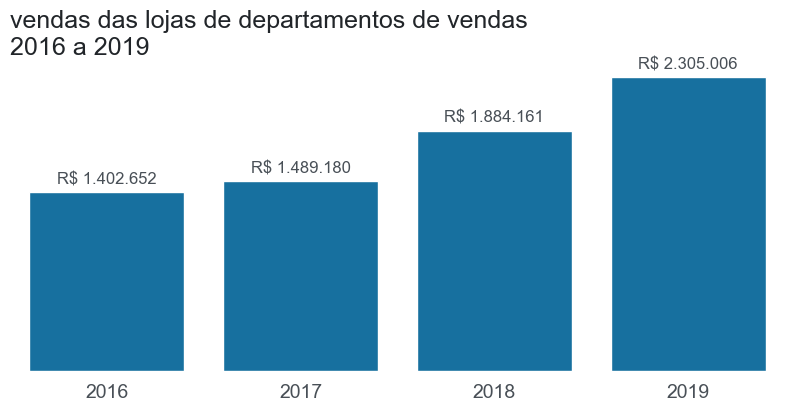

In [24]:
def grafico_vendas(cores: list=[AZUL2]):
    # importando as bibliotecas
    import matplotlib.pyplot as plt
    import seaborn as sns

    # area do grafico e tema de visualizacao
    fig, ax= plt.subplots(figsize=(10,4))
    sns.set_theme(style="white")

    # gerando o gráfico de colunas
    ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y="vendas", palette = cores)

    ax.set_title("vendas das lojas de departamentos de vendas\n2016 a 2019", loc="left", fontsize=18, color=CINZA1)
    ax.set_xlabel("")
    ax.set_ylabel("")
    # aumentando o tamanho do xlabel
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    # retirando as bordas
    sns.despine(left=True, bottom=True)
    # retirando a label do y
    ax.set_yticklabels([])

    # criando uma dupla onde o 1 valor vai ser a poscao dos anos
    # o 2 valor sera a qtd total de vendas
    for i, valor in enumerate(df_vendas_ano["vendas"]):
        # texto escrito em cada barra
        qtd = f'R$ {valor:,.0f}'.replace(",",".")
        # deslocando para nao ficar colado na barra
        offset = 1e5
        ax.text(i, valor + offset, qtd, color=CINZA2, fontsize=12, ha="center", va="center")
    return ax

ax = grafico_vendas()

### Destacando os dados

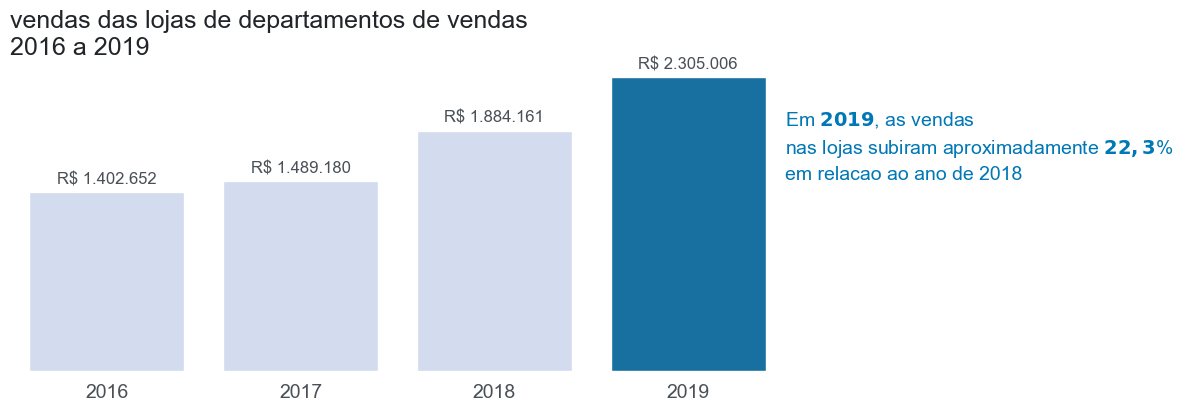

In [25]:
# definindo as cores do grafico
cores = []
for ano in df_vendas_ano.index:
    # localiza na posicao ANO a coluna VENDAS
    # o valor max de vendas eh igual a coluna iterada
    if df_vendas_ano.loc[ano, "vendas"] == df_vendas_ano.vendas.max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

# chamando a funda de grafico de colunas
ax = grafico_vendas(cores)

# anotando uma conclusao no grafico
# defini em negrito $\\bf{}$
ax.text(3.5, 1.5e6,
        'Em $\\bf{2019}$, as vendas\n'
        'nas lojas subiram aproximadamente $\\bf{22,3}$%\n'
        'em relacao ao ano de 2018',
        fontsize=14, linespacing=1.45, color=AZUL2)

# retorna a instacia a qual a fig pertence
fig = ax.get_figure()

<font color=green size=6> Conclusões: </font>

---

Um gráfico de colunas é ideal para compararmos valores com poucas categorias ou pequenos intervalos de tempo. Utilizamos aqui o recurso de destaque por cor para orientar o nosso público a visualizar o último período em comparação aos outros. Além disso, passamos uma informação em forma de texto apontando a evolução em relação ao ano anterior.  

Como sugestão, podemos testar essa técnica também com outros valores em nossa base de dados como, por exemplo, o lucro anual ou o faturamento em vendas pelo estado ou região que você preferir analisar.

## Grafico de Barras - Poucos Itens

---

### Pergunta 2

Qual eh o top 7 produtos que mais apresentaram lucros em nossos catalogos durante o periodo 2016 e 2019?

Duas var de interesse `tipo de produto` e `lucros`

In [30]:
# fazendo uma copia
top_lucro = vendas.copy()
# selecionando as coluna que vou utilizar
top_lucro = top_lucro[["tipo_produto", "lucro"]]

# agrupando os dados por tipo_produto, ordenando de maneira crescente pelo lucro e selecionando os 7 primeiros
top_lucro = top_lucro.groupby(["tipo_produto"]).agg("sum").sort_values("lucro", ascending=False)

top_7 = top_lucro[:7]
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


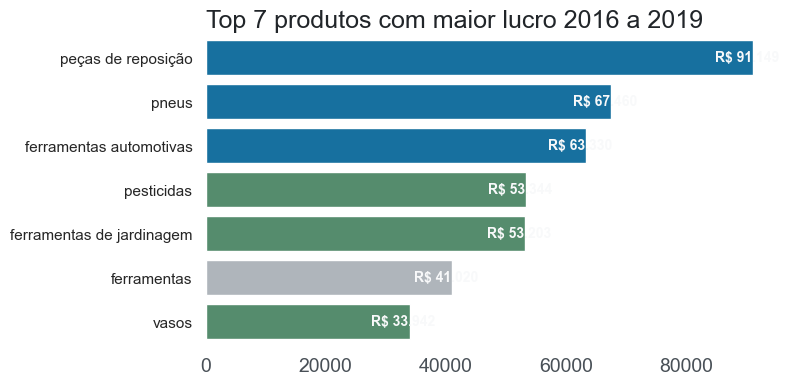

In [34]:
def grafico_top_7():
    # importando as bibliotecas
    import matplotlib.pyplot as plt
    import seaborn as sns

    # area do grafico e tema de visualizacao
    fig, ax= plt.subplots(figsize=(10,4))
    # ajuste da area
    fig.subplots_adjust(right=0.7)
    sns.set_theme(style="white")

    # definindo as cores
    cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

    # gerando o gráfico de colunas
    ax = sns.barplot(data = top_7, x="lucro", y = top_7.index, palette = cores)

    ax.set_title("Top 7 produtos com maior lucro 2016 a 2019", loc="left", fontsize=18, color=CINZA1)
    ax.set_xlabel("")
    ax.set_ylabel("")
    # aumentando o tamanho do xlabel
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    # retirando as bordas
    sns.despine(left=True, bottom=True)
    
    # criando uma dupla onde o 1 valor vai ser a poscao dos anos
    # o 2 valor sera a qtd total de vendas
    for i, valor in enumerate(top_7["lucro"]):
        # texto escrito em cada barra
        qtd = f'R$ {valor:,.0f}'.replace(",",".")
        # deslocando para nao ficar colado na barra
        offset = 1e3
        ax.text(valor - offset, i, qtd, color=CINZA5, fontsize=10, fontweight='bold', ha="center", va="center")
    return ax

ax = grafico_top_7()